In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

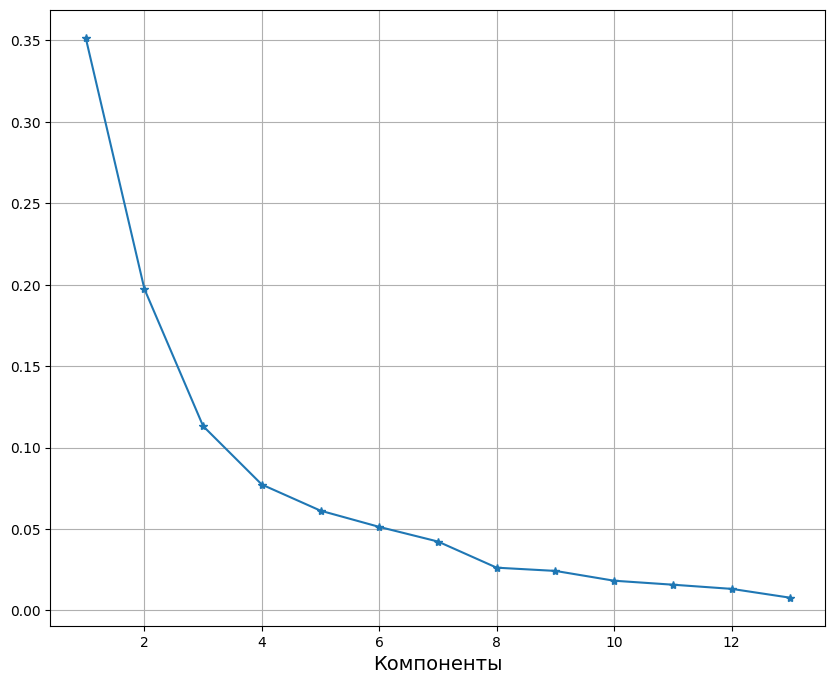

In [ ]:
X = load_wine()['data']
y = load_wine()['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

pca = PCA()

X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

ev = pca.explained_variance_
pv = ev/sum(ev)
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,len(pv)+1),pv,marker='*')
plt.xlabel('Компоненты', size = 14)
plt.grid()

In [ ]:
pca = PCA(n_components=4)
PC1 = pca.fit_transform(X_train)[:,0]
PC2 = pca.fit_transform(X_train)[:,1]
PC3 = pca.fit_transform(X_train)[:,2]
PC4 = pca.fit_transform(X_train)[:,3]

ldngs = pca.components_

In [ ]:
ldngs

array([[-0.09041052,  0.25298779,  0.01602653,  0.23041073, -0.08008494,
        -0.40226932, -0.43202681,  0.29396827, -0.30712828,  0.14263937,
        -0.32126087, -0.39611073, -0.24164525],
       [-0.47673487, -0.17699549, -0.3238999 ,  0.02707893, -0.38435766,
        -0.0878164 , -0.02713712, -0.01053185, -0.07541547, -0.48287748,
         0.2547302 ,  0.11157837, -0.40406288],
       [-0.23238477,  0.14068315,  0.58906416,  0.6268684 ,  0.16065207,
         0.1370189 ,  0.12736772,  0.09888055,  0.18264994, -0.15871686,
         0.06303092,  0.15071199, -0.17442128],
       [ 0.00653254,  0.5915821 , -0.29652032,  0.04753301, -0.24327871,
         0.14810192,  0.11529495, -0.26650234,  0.4165868 ,  0.06333815,
        -0.4026246 ,  0.11710444, -0.20246685]])

In [ ]:
ld = pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4'])

In [ ]:
ld

,PC1,PC2,PC3,PC4
0,-0.090411,-0.476735,-0.232385,0.006533
1,0.252988,-0.176995,0.140683,0.591582
2,0.016027,-0.323900,0.589064,-0.296520
3,0.230411,0.027079,0.626868,0.047533
4,-0.080085,-0.384358,0.160652,-0.243279
5,-0.402269,-0.087816,0.137019,0.148102
6,-0.432027,-0.027137,0.127368,0.115295
7,0.293968,-0.010532,0.098881,-0.266502
8,-0.307128,-0.075415,0.182650,0.416587
9,0.142639,-0.482877,-0.158717,0.063338


In [ ]:
scalePC1 = 1.0/(PC1.max()-PC1.min())
scalePC2 = 1.0/(PC2.max()-PC2.min())
scalePC3 = 1.0/(PC3.max()-PC3.min())
scalePC4 = 1.0/(PC4.max()-PC4.min())

In [ ]:
features = load_wine().feature_names

<Figure size 640x480 with 0 Axes>

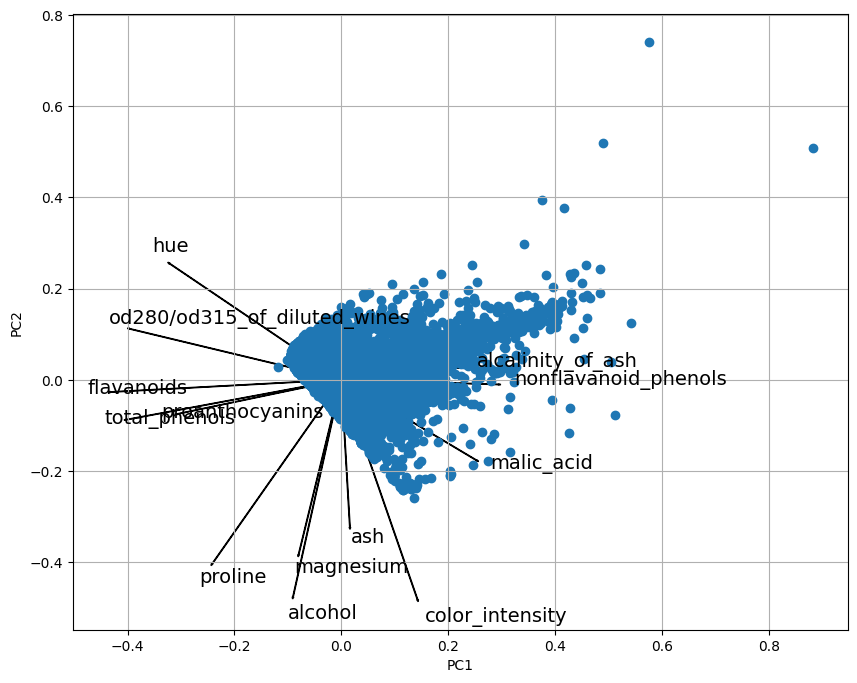

<Figure size 640x480 with 0 Axes>

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
for i, feature in enumerate(features):
  ax.arrow(0,0, ldngs[0,i],ldngs[1,i])
  ax.text(ldngs[0,i]*1.10,ldngs[1,i]*1.10,feature,fontsize=14)
ax.scatter(PC1*scalePC1, PC2*scalePC2)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.grid(True)
plt.figure()

In [ ]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

--2023-08-21 02:30:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default of credit card clients.xls’

default of credit c     [   <=>              ]   5.28M  10.2MB/s    in 0.5s    

2023-08-21 02:30:55 (10.2 MB/s) - ‘default of credit card clients.xls’ saved [5539328]



In [ ]:
df = pd.read_excel('/content/default of credit card clients.xls',header=1)

In [ ]:
X=df.iloc[:,1:-1]
y = df.iloc[:,-1].values

In [30]:
X.shape

(30000, 23)

In [31]:
sc = StandardScaler()
sc.fit(X)
scaled_X = sc.fit_transform(X)

In [32]:
pca = PCA()

In [33]:
x_PCA = pca.fit_transform(scaled_X)


In [34]:
ev = pca.explained_variance_
pv = ev/sum(ev)

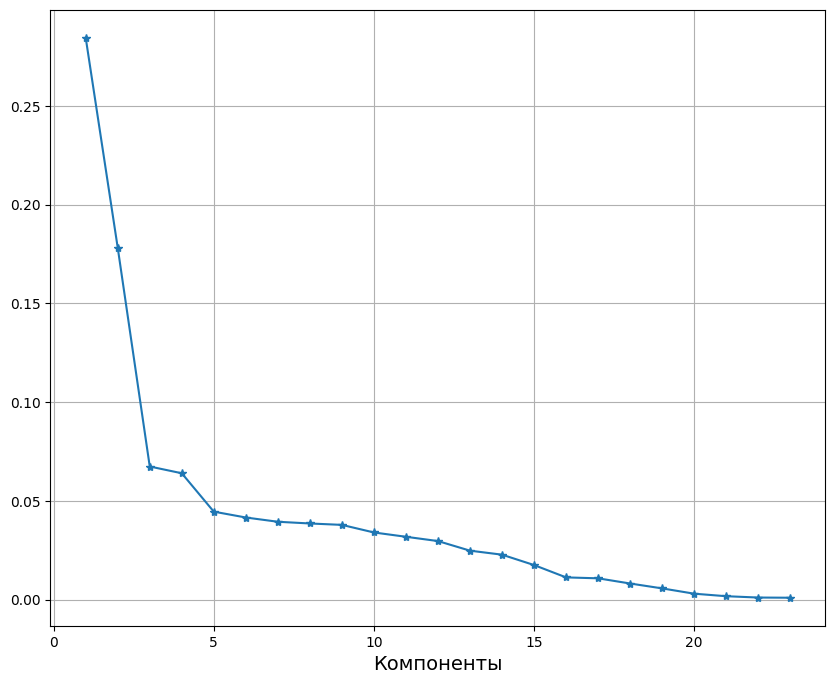

In [35]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,len(pv)+1),pv,marker='*')
plt.xlabel('Компоненты', size = 14)
plt.grid()

In [36]:
pca = PCA(n_components=4)
x_PCA = pca.fit_transform(scaled_X)

In [37]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [38]:
ld = pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4'],index = list(X.columns))
ld

,PC1,PC2,PC3,PC4
LIMIT_BAL,0.068518,0.316323,0.017604,0.070129
SEX,-0.021656,0.030595,0.023974,-0.078290
EDUCATION,0.019206,-0.091522,-0.316347,0.246672
MARRIAGE,-0.005600,-0.043252,0.453033,-0.444680
AGE,0.014232,0.066577,-0.462606,0.462526
PAY_0,0.161082,-0.298126,-0.017981,0.015658
PAY_2,0.194119,-0.334819,0.018063,0.050060
PAY_3,0.200213,-0.343892,0.062244,0.084625
PAY_4,0.207038,-0.344581,0.089128,0.109541
PAY_5,0.210961,-0.331601,0.108525,0.115468


In [39]:
PC1 = pca.fit_transform(scaled_X)[:,0]
PC2 = pca.fit_transform(scaled_X)[:,1]
PC3 = pca.fit_transform(scaled_X)[:,2]
PC4 = pca.fit_transform(scaled_X)[:,3]
lg = pca.components_

In [43]:
scalePC1 = 1.0/(PC1.max()-PC1.min())
scalePC2 = 1.0/(PC2.max()-PC2.min())
scalePC3 = 1.0/(PC3.max()-PC3.min())
scalePC4 = 1.0/(PC4.max()-PC4.min())

feature = list(X.columns)

<Figure size 640x480 with 0 Axes>

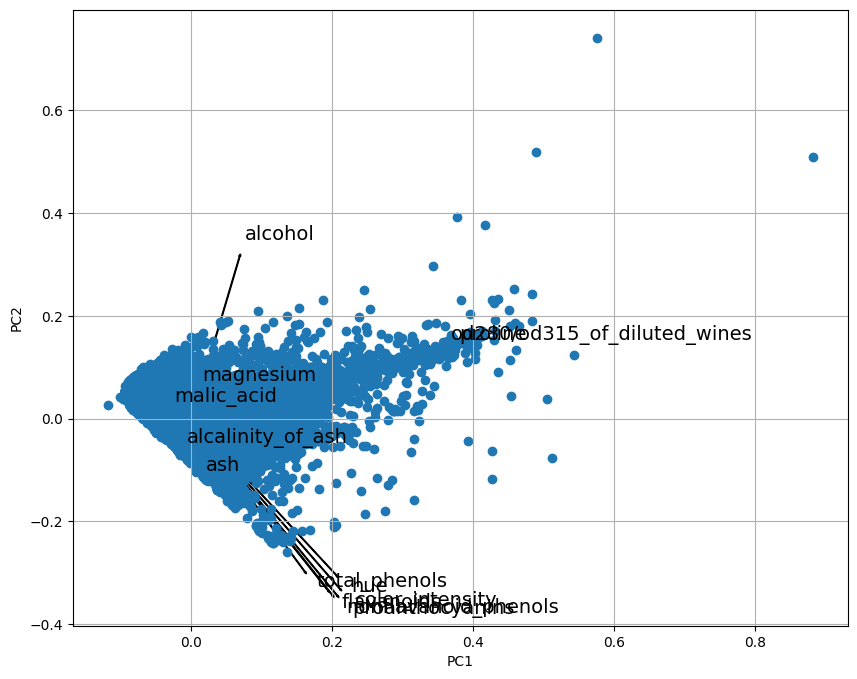

<Figure size 640x480 with 0 Axes>

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
for i, feature in enumerate(features):
  ax.arrow(0,0, lg[0,i],lg[1,i])
  ax.text(lg[0,i]*1.10,lg[1,i]*1.10,feature,fontsize=14)
ax.scatter(PC1*scalePC1, PC2*scalePC2)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.grid(True)
plt.figure()